In [ ]:
from google.colab import files
uploaded = files.upload()


Saving New_College_Event_Feedback_Task3.csv to New_College_Event_Feedback_Task3 (1).csv


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("New_College_Event_Feedback_Task3.csv")

# Show top 5 rows
df.head()


,Student Name,Department,Date,Rating,Feedback
0,Student_1,EEE,05/02/2024,4,Amazing event with great energy!
1,Student_2,EEE,10/02/2024,5,Super engaging and fun experience.
2,Student_3,IT,27/02/2024,4,Well-organized and insightful.
3,Student_4,EEE,26/02/2024,4,Super engaging and fun experience.
4,Student_5,CSE,28/02/2024,2,I didn’t enjoy the sessions.


In [ ]:
df.to_csv("Task3_Feedback_with_Sentiment.csv", index=False)

# Download file
files.download("Task3_Feedback_with_Sentiment.csv")

NameError: name 'df' is not defined

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize
analyzer = SentimentIntensityAnalyzer()


In [ ]:
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Add sentiment column
df["Sentiment"] = df["Feedback"].apply(analyze_sentiment)

# Preview
df.head()


,Student Name,Department,Date,Rating,Feedback,Sentiment
0,Student_1,EEE,05/02/2024,4,Amazing event with great energy!,Positive
1,Student_2,EEE,10/02/2024,5,Super engaging and fun experience.,Positive
2,Student_3,IT,27/02/2024,4,Well-organized and insightful.,Neutral
3,Student_4,EEE,26/02/2024,4,Super engaging and fun experience.,Positive
4,Student_5,CSE,28/02/2024,2,I didn’t enjoy the sessions.,Positive


In [ ]:
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,35
Neutral,17
Negative,8


In [ ]:
df.groupby("Sentiment")["Rating"].mean()


,Rating
Sentiment,
Negative,1.125000
Neutral,3.529412
Positive,3.857143


In [ ]:
df.groupby("Department")["Rating"].mean()


,Rating
Department,
CSE,3.222222
Civil,2.777778
ECE,3.214286
EEE,4.000000
IT,3.666667
Mechanical,3.545455


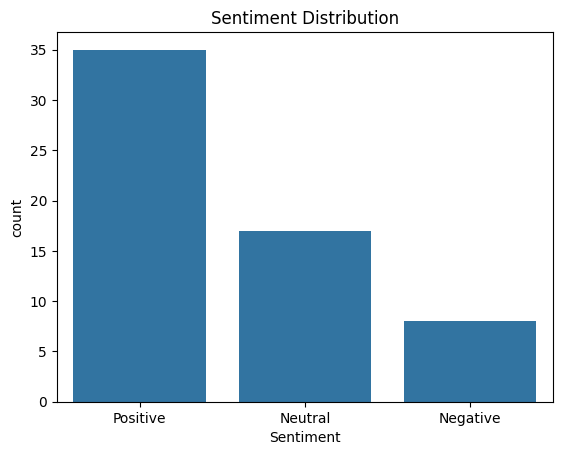

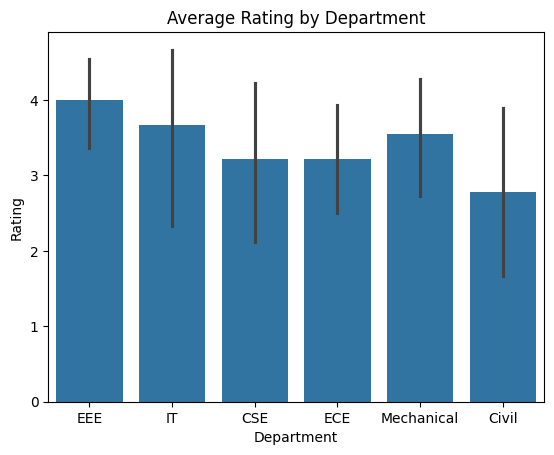

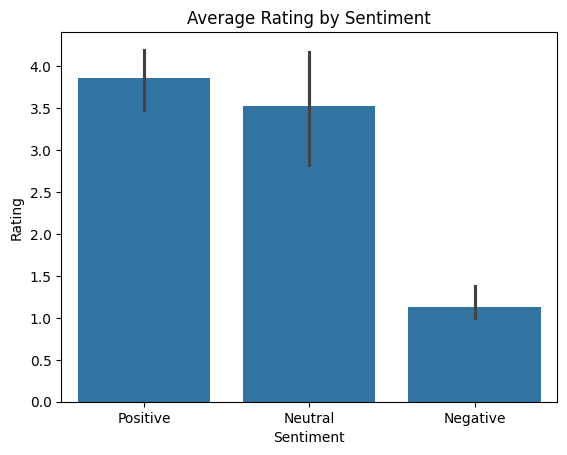

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment count plot
sns.countplot(data=df, x="Sentiment")
plt.title("Sentiment Distribution")
plt.show()

# Avg rating by department
sns.barplot(data=df, x="Department", y="Rating")
plt.title("Average Rating by Department")
plt.show()

# Avg rating by sentiment
sns.barplot(data=df, x="Sentiment", y="Rating")
plt.title("Average Rating by Sentiment")
plt.show()
